In [1]:
import potential
from potential import Aziz_params
from graphenetools import GrapheneTools as gt
import sys,os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

In [3]:
He_He_V_MP2 = np.loadtxt('He_He_MP2.csv', delimiter = ',', skiprows = 1)
He_Graphene_V_MP2 = np.loadtxt('He_Graphene_MP2.csv', delimiter = ',', skiprows = 1)

In [4]:
He_He_V_dat = np.loadtxt('He_He_V.csv', delimiter = ',', skiprows = 1)
He_Graphene_1_dat = np.loadtxt('Single_He_Graphene_V.csv', delimiter = ',', skiprows = 1)
He_barrier_dat = np.loadtxt('Single_He_opt_V_moving_over_barrier.csv', delimiter = ',', skiprows = 1)
He_Graphite_dat = np.loadtxt('He_Graphite_3.txt', skiprows = 1)

In [5]:
sigmaHapp = 2.643
epsilonHapp = 16.961

sigma1 = 2.74
epsilon1 = 16.2463

a = gt(notebook=True, strain=0.0)

zz = He_Graphene_1_dat[:,0]
V = a.V_0(zz, a.lattice.A, epsilonHapp, sigmaHapp)

zz = He_Graphene_1_dat[:,0]
V_Graphite_1 = a.V_0(zz, a.lattice.A, epsilon1, sigma1)

z_Graphite_Composite = He_Graphite_dat[:, 0]
V_Graphite_Composite = He_Graphite_dat[:, 1]

z_MP2 = He_He_V_MP2[:, 0]
V_MP2 = He_He_V_MP2[:, 1]

z_G_MP2 = He_Graphene_V_MP2[:, 0]
V_G_MP2 = He_Graphene_V_MP2[:, 1]

szalewicz_V = potential.szalewicz_2012(He_He_V_dat[:,0])
aziz_95_V = potential.aziz(He_He_V_dat[:,0], Aziz_params['1995'])

In [6]:
Aziz_params['1995']

{'ε': 10.956,
 'rₘ': 2.9683,
 'D': 1.438,
 'α': 10.5717543,
 'β': -2.07758779,
 'C': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.35186623, 0.        , 0.4149514 , 0.        ,
        0.17151143]),
 'A': 186924.404}

In [7]:
plt.style.use('../aps.mplstyle')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


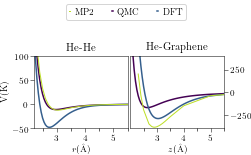

In [8]:
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots(1, 2) 
ax[0].plot(He_He_V_dat[:,0], szalewicz_V, color = colors[0])
ax[0].plot(He_He_V_dat[:,0], He_He_V_dat[:,2], color = colors[1])
ax[0].plot(z_MP2, V_MP2, label = 'MP2', color = colors[3], linewidth=1)
ax[0].set_xlim(2.2, 5.5)
ax[0].set_ylim(-50,100)
ax[0].set_title("He-He")
ax[0].set_xlabel(r'$r$(\AA)')
ax[0].set_ylabel(r'V(K)')
ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=2.5)
ax[0].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False, length=4)


ax[1].plot(zz,V, label = 'QMC', color = colors[0])
ax[1].plot(He_Graphene_1_dat[:,0], He_Graphene_1_dat[:,2], label = 'DFT', color = colors[1])
#ax[1].plot(zz,V1, label = 'Graphite')
ax[1].plot(z_G_MP2, V_G_MP2, color = colors[3], linewidth=1)
#ax[1].plot(z_Graphite_Composite,V_Graphite_Composite, label = 'Graphite?', color = colors[2], linewidth=1)
ax[1].set_xlim(2.01, 5.5)
ax[1].set_ylim(-400,400)
ax[1].yaxis.set_label_position("right")
ax[1].set_title("He-Graphene")
ax[1].set_xlabel(r'$z$(\AA)')
ax[1].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[1].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=2.5)
ax[1].tick_params(which='major', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=4)

fig.subplots_adjust(wspace=0.03, top=0.6)

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3)


#plt.legend()
#plt.show()

#plt.savefig('He_Graphene_Potential.pdf', transparent=False) 
#plt.savefig('He_Graphene_Potential.svg', transparent=False) 

In [9]:
len(szalewicz_V)

99

In [10]:
he_out = np.zeros((len(szalewicz_V), 12))
he_out[:,0] = He_He_V_dat[:,0]
he_out[:,1] = szalewicz_V
he_out[:,2] = He_He_V_dat[:,0]
he_out[:,3] = He_He_V_dat[:,2]
he_out[:len(z_MP2),4] = z_MP2
he_out[:len(V_MP2),5] = V_MP2
he_out[:len(zz),6] = zz
he_out[:len(V),7] = V
he_out[:len(He_Graphene_1_dat[:,0]),8] = He_Graphene_1_dat[:,0]
he_out[:len(He_Graphene_1_dat[:,2]),9] = He_Graphene_1_dat[:,2]
he_out[:len(z_G_MP2),10] = z_G_MP2
he_out[:len(V_G_MP2),11] = V_G_MP2


In [11]:
np.savetxt("He_potential.txt",he_out)

In [12]:
len(He_He_V_r)

NameError: name 'He_He_V_r' is not defined

In [ ]:
np.shape(He_Graphene_1_dat)

In [ ]:
np.min(V_Graphite_Composite)

In [ ]:
np.where(szalewicz_V<0)

In [ ]:
He_He_r = np.linspace(2,3,1000)
szalewicz_V1 = potential.szalewicz_2012(He_He_r)
np.where(szalewicz_V1<0)

In [ ]:
He_He_r[642]